# Project 2 : Investigating Gapminder Data

### by Omar BOUGACHA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

As part of my nano degree path, I had to choose the dataset of the second project. From the datasets proposed by Udacity, I choose to with the Gapminder dataset. I find that the data collected by Gapminder offers a great range of innovative and original data analysis. Thus, I mainly choose this dataset to have an outstanding project.  

Gapminder collected several metrics about the country's characteristics. These metrics are related to several contexts: 
- medical and health assistance 
- general development 
- social and economics
- etc...

In this project, I propose to analyze a variety of indicators. Here is the full list of all indicators I proposed to study: 
- CO2 emissions: this indicator measures the emissions of carbon dioxide caused by burning fossil fuels. It is measured in terms of tonnes per person. 
- Forest area: this indicator describes the surface of the country's forest in squared kilometers. 
- Energy usage: this refers to the total quantity of energy used in kW per person. 
- Population growth: this represents the percentage of population growth of each country. 
- Food supply: this indicator measures the mean energy content of a person's daily food consumption. It is expressed in (calories per person per day)
- Government health spending per person: this measures the mean money spend by the government for health care services per person. It is expressed in dollars. 
- Total health spending: this includes government health spending and the citizen's out-of-pocket money destined for health care services per person also expressed in dollars. 
- The income per person: this describes the gross domestic product per person it is adjusted for differences in the purchasing power (i.e. inflation).
- Employment rate: this describes the employment rate for people that are aged more than 15 years old. It is expressed in percentage. We should keep in mind that this does not include students. 
- Industry participation in the [gross domestic product](https://en.wikipedia.org/wiki/Gross_domestic_product) (GDP) is expressed in percentage. 
- Agriculture participation in the gross domestic product (GDP) is expressed in percentage. 
- Services participation in the gross domestic product (GDP) is expressed in percentage. These three indicators will help us define the major field of activity of the country.
- Murder total deaths: presents the total number of deaths caused by murder. This can be an indicator of violence in the country. 
- Suicide total deaths: presents the total number of deaths caused by suicide. This can be an indicator of mental health and stress levels in the country. 
- Human Development Index: This is a well-known indicator of the country's development. More pieces of information can be found in [Wikipedia](https://en.wikipedia.org/wiki/Human_Development_Index).

To make this analysis even more interesting, I proposed to classify the countries per continent. For this purpose, I used a dataset that matches the country name to its corresponding continent. This dataset is found in [Github](https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv).

In this dataset, I proposed we have a variety of indicators. We can try to answer a large range of questions. In this report I will answer the following questions: 
- How do the continent's indicators evolve? Are these trends are the same? 
- Which continent is improving more than the others? Are some continent's indicators becoming worse? 
- What are the sectors of the continents' activities?
- Which country is doing best on some indicators in Europe and Africa?
- What are the indicators that correlate with CO2 emissions? 
- What are the indicators that correlate with the Human Development Index? 
- Is there a relationship between the suicide (respectively murder) with other indicators?

Let's start by wrangling the data. But first, let's import the packages needed for this analysis.

In [1]:
# Let's import the packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

base_color = sns.color_palette()[0]
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

In this section, I present the methodology I used to get the data, load it, and process it to prepare it for analysis. First, I downloaded corresponding CSV files of the specified features from the Gapminder website. I loaded the data into a data frame. Finally, I trimmed the data to prepare it for analysis. 

### Loading and Creating the dataset

First, I defined a list of 2-uplets that contains the file name and its corresponding feature name. This will help me automatize the reading and converting part. 

In [2]:
data_files = [('Data/co2_emissions_tonnes_per_person.csv', 'co2_emissions'), 
              ('Data/forest_area_sq_km.csv', 'forest_area'),
              ('Data/energy_use_per_person.csv', 'energy_usage'),
              ('Data/population_growth_annual_percent.csv', 'population_growth'),
              ('Data/food_supply_kilocalories_per_person_and_day.csv', 'food_supply'),
              ('Data/government_health_spending_per_person_us.csv', 'gov_health_spend'),
              ('Data/total_health_spending_per_person_us.csv', 'health_money'),
              ('Data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv', 'income'),
              ('Data/aged_15plus_employment_rate_percent.csv', 'employment'),
              ('Data/industry_percent_of_gdp.csv', 'industry'),
              ('Data/agriculture_percent_of_gdp.csv', 'agriculture'),
              ('Data/services_percent_of_gdp.csv', 'services'),
              ('Data/murder_total_deaths.csv', 'murder'),
              ('Data/suicide_total_deaths.csv', 'suicide'),
              ('Data/hdi_human_development_index.csv', 'hdi'),
              ('Data/life_expectancy_years.csv', 'life_expectancy')
             ]

Let's load one example of dataset to check the format. 

In [3]:
forest_df = pd.read_csv('Data/forest_area_sq_km.csv')
forest_df.head(5)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,...,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0
1,Albania,7890.0,7870.0,7850.0,7830.0,7810.0,7790.0,7770.0,7750.0,7730.0,...,7810.0,7800.0,7790.0,7780.0,7760.0,7750.0,7740.0,7730.0,7720.0,7720.0
2,Algeria,16700.0,16600.0,16500.0,16400.0,16300.0,16200.0,16100.0,16100.0,16000.0,...,16100.0,16900.0,17700.0,18400.0,19200.0,19300.0,19300.0,19400.0,19500.0,19600.0
3,Andorra,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
4,Angola,610000.0,609000.0,607000.0,606000.0,605000.0,604000.0,602000.0,601000.0,600000.0,...,590000.0,589000.0,587000.0,586000.0,585000.0,584000.0,582000.0,581000.0,580000.0,579000.0


See the format of the data found in the Gapminder website is as (country, value_year1, value_year2, ... etc). Each feature is represented in this timeseries data structure. But since we are willing to work with several features (indicators) we need to change this format into (country, year, indicators_value).

Let's define a function that will change the data structure of a given file into the format (country, year, value).

In [4]:
def changing_df_format(input_file, feature_name):
    input_df = pd.read_csv(input_file)
    output_df = pd.DataFrame(columns=['country', 'year', feature_name])
    years_list = input_df.columns.tolist()[1:]
    for elt in input_df['country'].unique().tolist():
        val_list = input_df[input_df['country']==elt].values[0][1:].tolist()
        c_list = np.repeat(elt, len(val_list))
        tran_df = pd.DataFrame({'country': c_list, 'year':years_list, feature_name:val_list})
        output_df = output_df.append(tran_df, ignore_index=True)
    return output_df

Let's apply this function plus let's merge them into the format (country, year, feature1, feature2, ...). The merge will be done on the country and the year at the same time because we want to identify for a certain country at a certain year the values of all its indicators. Since not all features are defined in the same range of years and to avoid having to deal with a large dataset full with empty values, we will merge the data frames in an inner mode which will eliminate automatically a large combination of (country, year) if not present in both features. The corresponding code is: 

In [5]:
gapminder_df = changing_df_format(data_files[0][0], data_files[0][1])
for elt in data_files[1:]:
    df = changing_df_format(elt[0],elt[1])
    gapminder_df = gapminder_df.merge(df, right_on=['country', 'year'], left_on=['country', 'year'])

Let's check the resulting dataframe:

In [6]:
gapminder_df.head(5)

,country,year,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy
0,Albania,1995,0.672,7790.0,417.0,-0.618,2720.0,13.9,27.9,4130,48.1,22.5,55.8,21.7,267.0,142.0,0.628,74.6
1,Albania,1996,0.652,7770.0,448.0,-0.622,2840.0,17.1,43.0,4530,48.2,14.4,35.1,44.2,295.0,150.0,0.637,74.4
2,Albania,1997,0.499,7750.0,385.0,-0.625,2730.0,14.2,36.1,4060,48.9,14.2,30.2,47.9,327.0,162.0,0.636,72.5
3,Albania,1998,0.565,7730.0,427.0,-0.629,2730.0,18.6,47.1,4450,48.8,11.6,27.1,50.1,338.0,170.0,0.646,74.5
4,Albania,1999,0.958,7710.0,576.0,-0.633,2800.0,28.1,65.0,5060,48.3,12.6,24.4,53.0,309.0,175.0,0.656,74.6


So we obtained the following data shape.

In [7]:
gapminder_df.shape

(2208, 18)

Our dataset, at this point, is composed of 2208 entries and 18 features.

Let's add the contient of each country.

In [8]:
continents_df = pd.read_csv("Data/Countries_Continents.csv")
continents_df.rename(str.lower, axis='columns',inplace=True)
continents_df.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [9]:
gapminder_df = gapminder_df.merge(continents_df, left_on='country', right_on='country')
gapminder_df.head()

,country,year,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent
0,Albania,1995,0.672,7790.0,417.0,-0.618,2720.0,13.9,27.9,4130,48.1,22.5,55.8,21.7,267.0,142.0,0.628,74.6,Europe
1,Albania,1996,0.652,7770.0,448.0,-0.622,2840.0,17.1,43.0,4530,48.2,14.4,35.1,44.2,295.0,150.0,0.637,74.4,Europe
2,Albania,1997,0.499,7750.0,385.0,-0.625,2730.0,14.2,36.1,4060,48.9,14.2,30.2,47.9,327.0,162.0,0.636,72.5,Europe
3,Albania,1998,0.565,7730.0,427.0,-0.629,2730.0,18.6,47.1,4450,48.8,11.6,27.1,50.1,338.0,170.0,0.646,74.5,Europe
4,Albania,1999,0.958,7710.0,576.0,-0.633,2800.0,28.1,65.0,5060,48.3,12.6,24.4,53.0,309.0,175.0,0.656,74.6,Europe


Now we have out dataset with the intended features. Let's assess its quality and point out some of the issues that need to be cleaned.

### Dataset Quality Assessment

- Let's start by investigating the types of each column:

In [10]:
gapminder_df.dtypes

country               object
year                  object
co2_emissions        float64
forest_area          float64
energy_usage         float64
population_growth    float64
food_supply          float64
gov_health_spend     float64
health_money         float64
income                object
employment           float64
industry             float64
agriculture          float64
services             float64
murder               float64
suicide              float64
hdi                  float64
life_expectancy      float64
continent             object
dtype: object

We can see that the year and the income are presented as objects. We need to change their types from object to int and float repectively. 

- Let's check for empty values:

In [11]:
gapminder_df.isnull().sum()

country                0
year                   0
co2_emissions          0
forest_area            0
energy_usage         176
population_growth      1
food_supply           32
gov_health_spend      12
health_money          12
income                 0
employment             0
industry              69
agriculture           65
services             119
murder                 0
suicide                0
hdi                  104
life_expectancy        0
continent              0
dtype: int64

We can see that some features present a few missing data. We can either eliminate these features, eliminate the rows containing missing data, impute missing values, or we can keep it like it is. The choice of the missing data strategy depends on the type of the intended analysis. Let's deepen the investigation of the missing values.
Let's check empty values per country:

In [12]:
data ={'country':[] }
empty_features = gapminder_df.columns.tolist()[2:]
for elt in empty_features:
    data[elt]=[]
for country in gapminder_df["country"].unique().tolist():
    data['country'].append(country)
    for elt in empty_features:
        data[elt].append(gapminder_df[gapminder_df['country']==country][elt].isnull().sum())
empty_val_counts_df = pd.DataFrame(data)
empty_val_counts_df['Total'] = empty_val_counts_df[empty_features].apply(lambda x: np.sum(x), axis=1)
empty_val_counts_df.head(5)

,country,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent,Total
0,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Algeria,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,16
2,Angola,0,0,0,0,0,0,0,0,0,9,9,9,0,0,4,0,0,31
3,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
empty_val_counts_df.sort_values(by=['Total']).head(10)

,country,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent,Total
0,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,Panama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87,Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85,Norway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,New Zealand,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80,Netherlands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,Namibia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,Morocco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,Moldova,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's count the number of countries that present at leat one missing value. 

In [14]:
empty_val_counts_df[empty_val_counts_df['Total']>0]['country'].count()

38

In [15]:
gapminder_df['country'].nunique()

125

So out of 125 country we have 38 that presents some missing data. Let's see how these missing values are distributed over the continents.

In [16]:
empty_df = empty_val_counts_df[empty_val_counts_df['Total']>0].merge(continents_df, 
                                                                     left_on='country', right_on='country')
empty_df.head(5)

,country,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent_x,Total,continent_y
0,Algeria,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,16,Africa
1,Angola,0,0,0,0,0,0,0,0,0,9,9,9,0,0,4,0,0,31,Africa
2,Bahamas,0,0,12,0,0,0,0,0,0,0,0,0,0,0,5,0,0,17,North America
3,Barbados,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,North America
4,Belgium,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,5,Europe


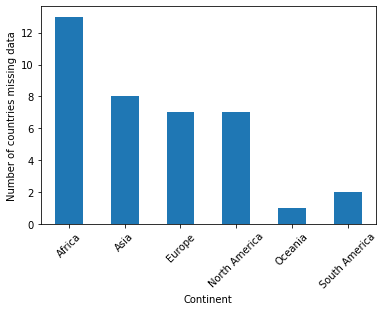

In [17]:
empty_df.groupby('continent_y')['country'].count().plot(kind='bar')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('Number of countries missing data')
plt.show()

So most of the countries missing data are from Africa. I could think of 1000 reasons why this result is not surprising. Mostly, countries in Africa are poor and some indicators require a lot of effort, organization, and resources to track. Also, another common reason is that these countries are most under dictatorship or semi-democracy, thus information access is a bit tricky. 

Let's continue our analysis journey and start by cleaning the data.

### Data Cleaning

Let's fix the type of data for the year and income features.

In [18]:
gapminder_df['year'] = pd.to_numeric(gapminder_df['year'], downcast='integer')
gapminder_df['income'] = pd.to_numeric(gapminder_df['income'], downcast='float')
gapminder_df.dtypes

country               object
year                   int16
co2_emissions        float64
forest_area          float64
energy_usage         float64
population_growth    float64
food_supply          float64
gov_health_spend     float64
health_money         float64
income               float32
employment           float64
industry             float64
agriculture          float64
services             float64
murder               float64
suicide              float64
hdi                  float64
life_expectancy      float64
continent             object
dtype: object

Concerning the missing data, for a great part of this study, I focus on the analysis of either the totality of a continent or the relationship between the features. Therefore, the missing data won't affect this analysis. For the continent analysis, the continent's indicators values are obtained from the mean value of the countries in that continent on which we have data. And the mean function implemented will simply ignore the missing data. As for the relationship between the features, the missing data are also automatically ignored. The only part when the missing data could disturb the analysis is when analyzing countries' data. In that analysis, we will directly exclude countries that present missing pieces of information but only when needed. 

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have out data cleaned, trimmed, and ready for exploration, let's start answering our questions.

First, let's create the continents' data frame that will contain the continents' performances on different indicators.

In [19]:
continent_eval = gapminder_df.groupby(['continent','year'],as_index=False).mean()
continent_eval.head(5)

,continent,year,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy
0,Africa,1995,1.025066,139354.137931,641.333333,2.484483,2220.344828,25.679310,52.424483,3861.068848,57.344828,26.881111,22.507778,46.092308,1254.091034,1039.903103,0.457250,58.258621
1,Africa,1996,1.015597,138433.034483,642.619048,2.426897,2239.310345,25.727241,54.212759,3975.517334,57.489655,27.569630,23.075926,44.492308,1283.102759,1069.437241,0.459625,58.058621
2,Africa,1997,1.027683,137480.862069,644.000000,2.377241,2247.586207,26.213103,53.632069,4064.827637,57.344828,27.144444,22.970741,45.150000,1342.718621,1117.439310,0.461083,57.748276
3,Africa,1998,1.049686,136601.413793,650.190476,2.321034,2257.931034,25.794828,52.184828,4100.931152,57.110345,25.974074,22.954815,47.073077,1391.231724,1155.255172,0.462417,57.503448
4,Africa,1999,1.026024,135645.827586,657.476190,2.287931,2285.517241,24.771724,49.682759,4078.482666,57.520690,27.270370,21.654444,45.965385,1446.647241,1194.352759,0.460320,57.362069


### How do the continents' indicators evolve overtime? Are these trends the same for all continents? Which are the continents that are leading in every indicator?

#### Carbon Dioxide Emissions:

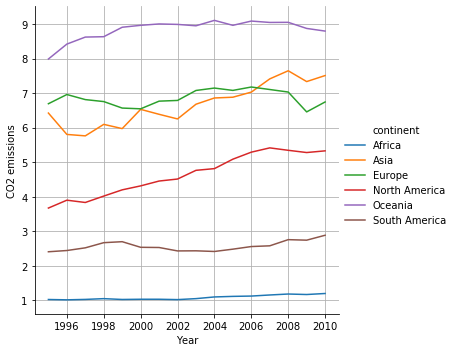

In [20]:
sns.relplot(x="year", y='co2_emissions', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("CO2 emissions")
plt.show()

* The emissions of CO2 are growing for the following continents (Oceania, Asia, North and South America, and Africa).
* However, these emissions are almost the same but fluctuating for Europe. 
* It seems like the Oceania continent is the most responsible for producing CO2. On the other side, Africa is the least polluting continent.

#### Forest Area

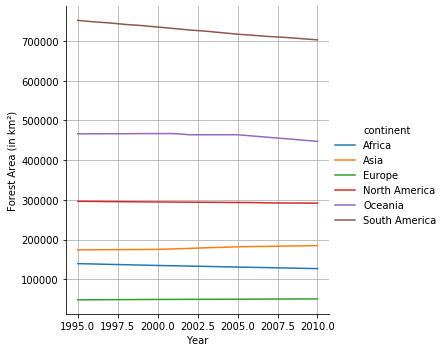

In [21]:
sns.relplot(x="year", y='forest_area', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Forest Area (in km²)")
plt.show()

* The area of forests is decreasing in South and North America, Oceania, and Africa. The rate, however, is most important in South America. 
* On the other hand, Europe is almost conserving the same area of forest or slightly increasing it we cannot say from this graph further investigation should be done. 
* Asia is slightly increasing the forest area. Could this be caused by a growing agriculture activity or just by replanting trees? We could maybe answer this question once we see the agriculture activity evolution. 
* Well it is no surprise that South America has the largest Forest Area (Thanks to the [Amazon rainforest](https://en.wikipedia.org/wiki/Amazon_rainforest)). However, each year large surfaces are lost due to [wildfires](https://news.mongabay.com/2019/08/how-many-fires-are-burning-in-the-amazon/). 

#### Energy Usage

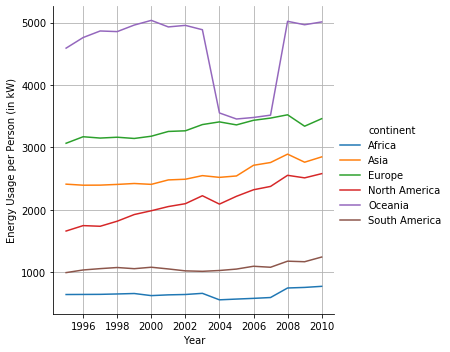

In [22]:
sns.relplot(x="year", y='energy_usage', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Energy Usage per Person (in kW)")
plt.show()

* The trends in using energy are growing. This is quite natural since we are daily increasing the electric devices in our homes coffee machines, TV, etc... 
* However, we can observe a strange phenomenon in this data. In all continents, there is a decrease in using energy from 2003 to 2004. This fall in used energy is so important for Oceania. However, for this continent, we can notice that there is a great increase between 2007 to 2008. 
* Another strange activity for energy usage is a small decrease between 2008 and 2009. Could this be caused by the economic crisis? 

#### Population Growth

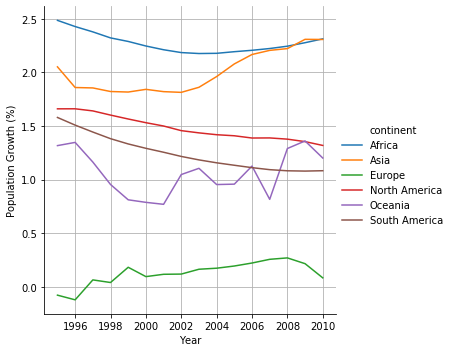

In [23]:
sns.relplot(x="year", y='population_growth', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Population Growth (%)")
plt.show()

* When observing the population growth evolution we can see two trends: (i) increasing trends such in Asia and Europe, (ii) decreasing trends as in Africa, North and South America, and slightly Oceania. 
* We can conclude that Africa had the highest rate of population growth. However, in 2010 they are almost equal to Asia. 
* We can see that in 1995 and 1996, Europe had negative rates of population growth. 

#### Food Supply

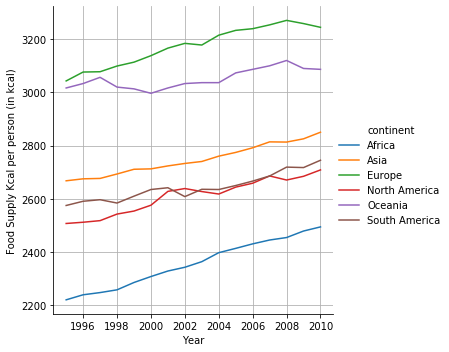

In [24]:
sns.relplot(x="year", y='food_supply', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Food Supply Kcal per person (in kcal)")
plt.show()

* The food supply quantity per person is increasing for all the continents. 
* However starting from 2008 the food supplies in Europe and Oceania are decreasing. Now this observation should be considered with caution since we don't have enough data to see if it's a new trend or just a fluctuation caused by the economic crisis.

#### Government Health Spend

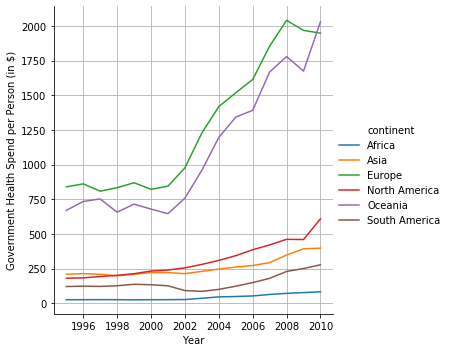

In [25]:
sns.relplot(x="year", y='gov_health_spend', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Government Health Spend per Person (in $)")
plt.show()

* The amount of money paid by the government to guarantee some health care services for their citizens are increasing over the years. However, the slope of trends differs. We can see two clusters of continents: (i) rapidly increasing amounts that include Europe and Oceania, and (ii) slowly growing containing the rest of the continents.
* These clusters also proves that Europe and Oceania are focusing on providing good health care for their citizens. While the other continents either do not have the resources to do so like South America and Africa, have a lot of citizens to care for like in Asia, or have a very poor health insurance policy like North America. 

#### Total Health Money

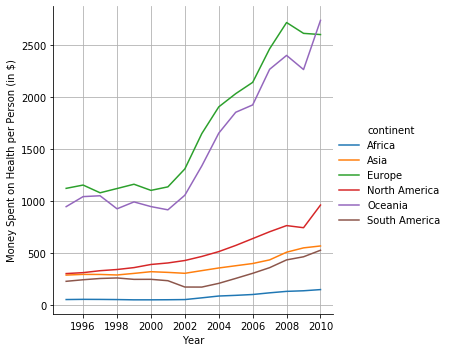

In [26]:
sns.relplot(x="year", y='health_money', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Money Spent on Health per Person (in $)")
plt.show()

* The curves of the total health money is similar to the one of the government money. Does this mean that health care cost more in Europe and Oceania? Or that people living in this country pay a lot of attention to their health and go several times to the doctor? Unfortunately with the available data at Gapminder, we cannot investigate these questions.

#### Income

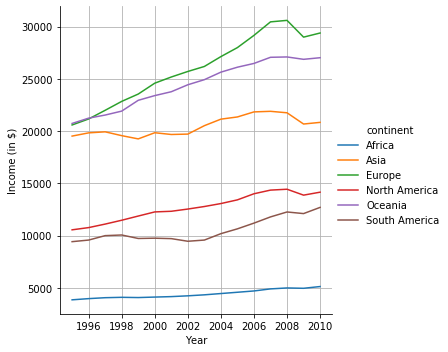

In [27]:
sns.relplot(x="year", y='income', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Income (in $)")
plt.show()

* The incomes are increasing for all the continents. 
* However starting from 2008 the incomes have seen a small fall. This observation is caused by the economic crisis.

#### Employment Rate

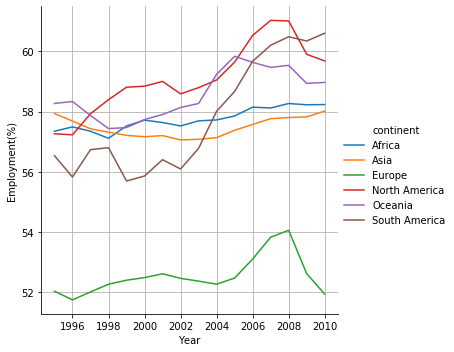

In [28]:
sns.relplot(x="year", y='employment', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Employment(%)")
plt.show()

* The employment trens are increasing for all the continents. 
* However starting from 2008 the curves have decreasing for Europe, Oceania, and North America. This observation is caused by the economic crisis.

#### Industry %

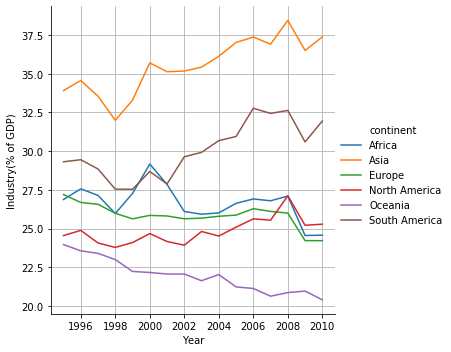

In [29]:
sns.relplot(x="year", y='industry', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Industry(% of GDP)")
plt.show()

* For the industry participation in the GDP we have two clusters: (i) trends that are increasing (i.e. for Asia and Oceania), and (ii) trends that are decreasing for the rest. 
* In the industry percentage of GDP we can also see the effects of the economic crisis. 

#### Agriculture %

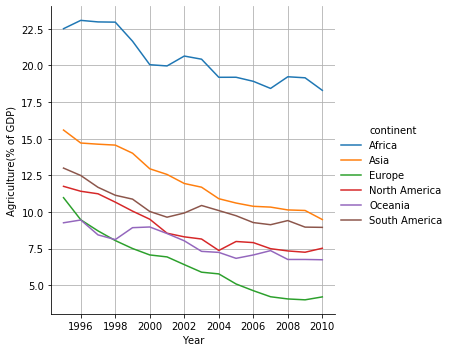

In [30]:
sns.relplot(x="year", y='agriculture', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Agriculture(% of GDP)")
plt.show()

* The agriculture participation in GDP are decreasing for all continents.
* Activities in Africa seems to be based on agriculture more than other continents.
* In these curves we cannot see clearly the effect of the economic crisis. 

#### Services %

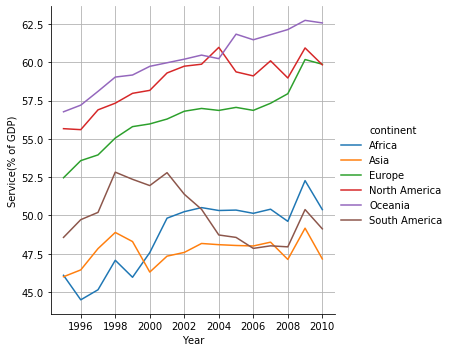

In [31]:
sns.relplot(x="year", y='services', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Service(% of GDP)")
plt.show()

* Trends of services are increasing for Europe, North America, and Oceania. However, they are almost the same for Asia but with a lot of fluctuations. And they are decreasing relative to South America. 
* We can also notice that Oceania is leading in the services % of GDP. 
* This curve also shows the effect of the economic crisis. We can conclude that the economic crisis affected the industry and the services but not agriculture activities. Which is quite logical since agriculture activities depend more on the soil quality and weather. 

#### Murder Deaths

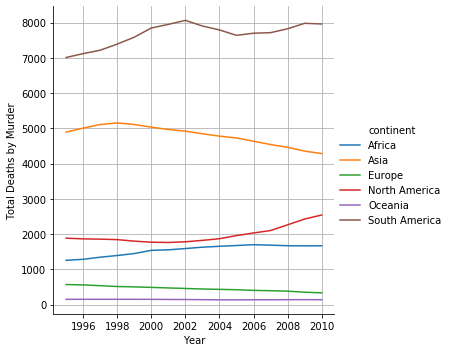

In [32]:
sns.relplot(x="year", y='murder', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Total Deaths by Murder")
plt.show()

* The figure shows two clusters of trends: (i) increasing for North and South America and Africa, and (ii) decreasing for Europe, Asia, and Oceania. 
* South American countries have the highest numbers of murders. While, on the other side, Oceania has the lowest.

#### Suicide Deaths

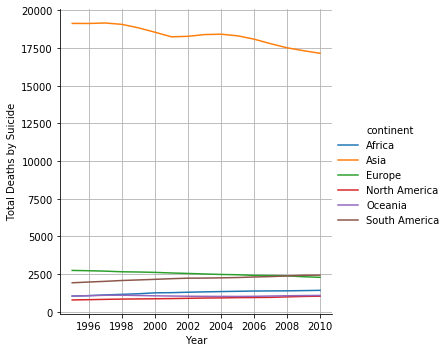

In [33]:
sns.relplot(x="year", y='suicide', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Total Deaths by Suicide")
plt.show()

* For the total number of death by suicide, we have two clusters: (i) continents with increasing trends (Africa, North, and South America and Oceania), and (ii) continents with decreasing trends (Asia and Europe). Seems like Asian and European countries are investing in reducing stress levels and implementing methods and resources to reduce suicides. 
* Asia presents the highest number of suicides which is quite understandable since the continent has almost 2/3 of the world's population. 

#### Life Expectancy

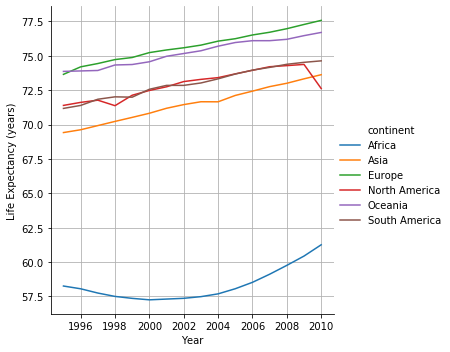

In [34]:
sns.relplot(x="year", y='life_expectancy', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Life Expectancy (years)")
plt.show()

* All the curves of life expectancy are increasing. This is quite natural due to science development, health care services improvement, and better life quality. 
* Being born in the European countries guarantee the best life expectancy. However, Africans are by far the most misfortunate of all newborns with the lowest life expectancy values.

#### Human Development Index

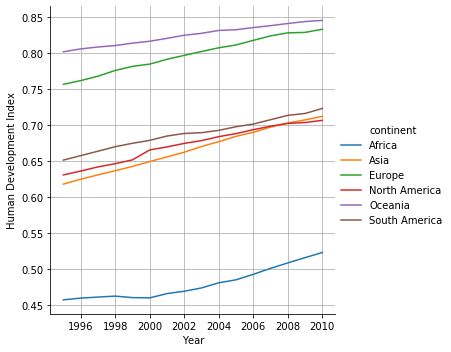

In [35]:
sns.relplot(x="year", y='hdi', hue='continent', kind='line', data= continent_eval)
plt.grid()
plt.xlabel('Year')
plt.ylabel("Human Development Index")
plt.show()


* European countries seem to be the most developed countries in terms of HDI. While African countries are struggling with the lowest by far HDI values.
* All the HDI curves are increasing except for the curve of Oceania. What could be behind this deterioration of the human development index? 

### Which continent are improving more than the others? Are some continent's indicators becoming worse? 

To measure the improvement in the indicator, I propose to compute the difference between the value of 2010 and 1995. For this purpose, the delta_dev function will compute and return a new data frame with the difference of indicators.

In [36]:
def delta_dev(df):
    data = {'continent':[]}
    for elt in df.columns.tolist()[2:]:
        data[elt]=[]
    for cont in df['continent'].unique().tolist():
        data['continent'].append(cont)
        a = df[df['continent']==cont]
        a_2010 = a[a['year']==2010].reset_index(drop=True)
        a_1995 = a[a['year']==1995].reset_index(drop=True)
        for elt in df.columns.tolist()[2:]:
            data[elt].append(a_2010[elt][0]-a_1995[elt][0])
    return pd.DataFrame(data)

In [37]:
continent_dev_df = delta_dev(continent_eval)
continent_dev_df

,continent,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy
0,Africa,0.173710,-12562.172414,131.212121,-0.172483,274.137931,56.960333,95.711232,1270.896484,0.886207,-2.305556,-4.207407,4.288462,412.071724,381.024483,0.065819,3.000000
1,Asia,1.085778,10771.888889,436.961538,0.255256,182.592593,188.178519,280.253333,1311.851562,0.081481,3.467208,-6.107923,1.160000,-609.298519,-1982.629630,0.094179,4.207407
2,Europe,0.050949,2355.615385,393.650472,0.161385,201.472527,1108.215128,1479.458974,8795.384766,-0.094872,-2.979626,-6.771658,7.409771,-235.954872,-458.776923,0.076607,3.925641
3,North America,1.656133,-4678.000000,919.333333,-0.341333,201.333333,428.014833,659.210000,3600.666992,2.420000,0.736667,-4.223333,4.169048,658.220000,250.513333,0.075876,1.226667
4,Oceania,0.808667,-18913.333333,420.000000,-0.115667,70.000000,1359.500000,1791.900000,6286.666016,0.700000,-3.566667,-2.523333,5.800000,-10.766667,39.366667,0.043667,2.833333
5,South America,0.477833,-49125.000000,249.409091,-0.496583,170.000000,156.750000,298.866667,3277.500000,4.066667,2.633333,-4.045000,0.558333,951.866667,507.991667,0.071795,3.458333


#### Carbon Dioxide Emissions

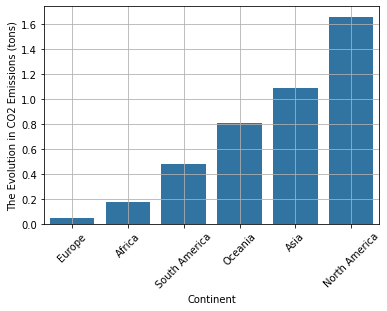

In [38]:
sns.barplot(x="continent", y='co2_emissions', data=continent_dev_df.sort_values('co2_emissions'),
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in CO2 Emissions (tons)')
plt.show()

As we said before, all continents had its CO2 emissions increased. However, Europe is the most environment-friendly continent with the lowest increase in CO2 emissions.

#### Forest Area

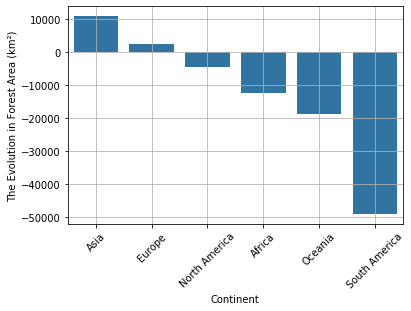

In [39]:
sns.barplot(x="continent", y='forest_area', data=continent_dev_df.sort_values('forest_area',
                                                                             ascending=False),
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Forest Area (km²)')
plt.show()

We can see that Asia and Europe are the only continents where the forest areas are increasing. Asia is working hard on replantation. This could be an attempt to counterbalance the amount of harmful increase in CO2 emissions. On the other hand, we can notice that South America is having a big deforestation issue. 

#### Energy Usage

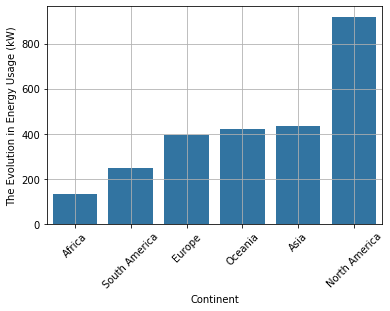

In [40]:
sns.barplot(x="continent", y='energy_usage', data=continent_dev_df.sort_values('energy_usage'), 
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Energy Usage (kW)')
plt.show()


The evolution in energy consumption in Africa is quite limited. This is at the same time good and bad. It is a good indicator because consuming more energy means the need for more production and hence for more pollution. And bad because Africa is suffering from a shortage in the electricity coverage. Not every home in Africa has electricity. You can find whole villages without electric energy. The consumption of energy is also an indicator of poverty. Because people do not have a lot of electric devices. Meaning they probably do not have the resources to buy them.

#### Population Growth

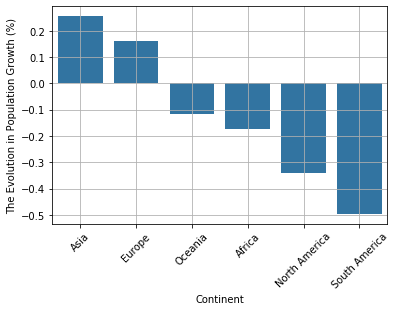

In [41]:
sns.barplot(x="continent", y='population_growth', 
            data=continent_dev_df.sort_values('population_growth',
                                              ascending=False), color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Population Growth (%)')
plt.show()

Between 1995 and 2010, the population growth rate has increased in Asia and Europe. This is quite good for Europe who had a negative growth rate meaning that deaths were more important than newborns. Interpreting the evolution in population growth is quite tricky. Because it can be good to increase the growth of some countries (or continents) and it can also be bad to have overcrowded countries/continents. 

#### Food Supply 

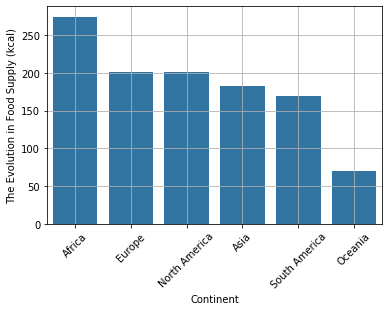

In [42]:
sns.barplot(x="continent", y='food_supply', data=continent_dev_df.sort_values('food_supply',
                                                                              ascending=False),
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Food Supply (kcal)')
plt.show()

Africa is doing great and leading the evolution of food supply. This is great news since most African countries suffer from [malnutrition](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5426674/) and even [starvation](https://www.sos-usa.org/about-us/where-we-work/africa/hunger-in-africa). 

#### Government Health Spend

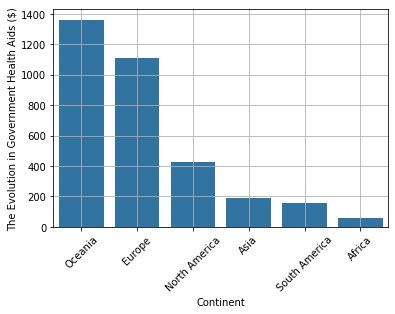

In [43]:
sns.barplot(x="continent", y='gov_health_spend', 
            data=continent_dev_df.sort_values('gov_health_spend', ascending=False),
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Government Health Aids ($)')
plt.show()

Oceania and European countries are increasing their financial aids towards health care services. For Europe, this is not surprising since its demographic distribution tends to become more negatively skewed (most citizens are old). Thus, the requirement for health care is more important. 

#### Total Health Money

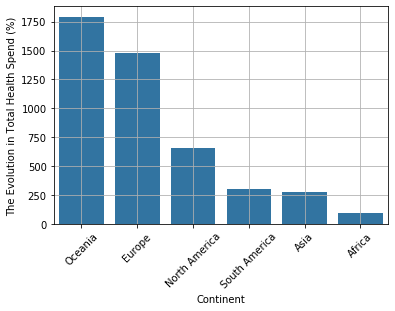

In [44]:
sns.barplot(x="continent", y='health_money', 
            data=continent_dev_df.sort_values('health_money', ascending=False),
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Total Health Spend (%)')
plt.show()

The evolution of total money spent on health services is quite identical to the money invested by the government. 

#### Income

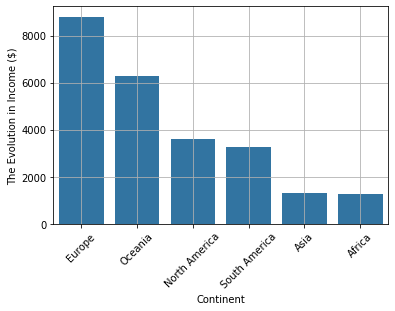

In [45]:
sns.barplot(x="continent", y='income', 
            data=continent_dev_df.sort_values('income', ascending=False),
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Income ($)')
plt.show()

Incomes are increasing in all continents. However, the wealthier the continent's countries the higher this increase is.

#### Employment Rate

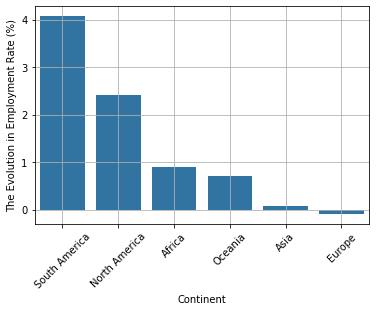

In [46]:
sns.barplot(x="continent", y='employment', 
            data=continent_dev_df.sort_values('employment', ascending=False), 
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Employment Rate (%)')
plt.show()

Employment rates are also increasing but strangely South and North America seem to be the new high demanding for working forces. However, the employment rates in Europe are decreasing. This is either caused by the demographic effects more people are old and retired. Or it could be that the demands for the working force is decreasing and the work market is saturated.

#### Industry %

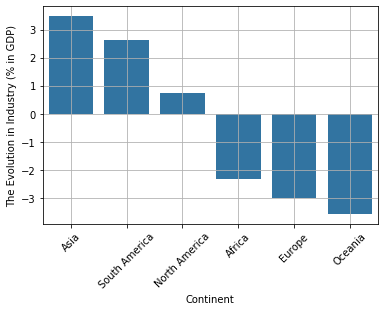

In [47]:
sns.barplot(x="continent", y='industry', 
            data=continent_dev_df.sort_values('industry', ascending=False), 
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Industry (% in GDP)')
plt.show()

Asian and South American countries are increasing their industrial activities. Their economics tend to rely more on industrial inputs. 

#### Agriculture %

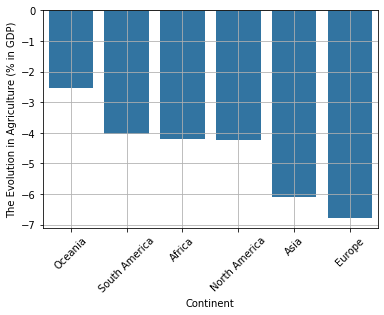

In [48]:
sns.barplot(x="continent", y='agriculture', 
            data=continent_dev_df.sort_values('agriculture', ascending=False), 
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Agriculture (% in GDP)')
plt.show()

At the same time, the input in the GDP by agricultural activities is decreasing rapidly especially for Europe. The economics of all countries seems to shift from agricultural activities to industrial or service providers.

#### Services %

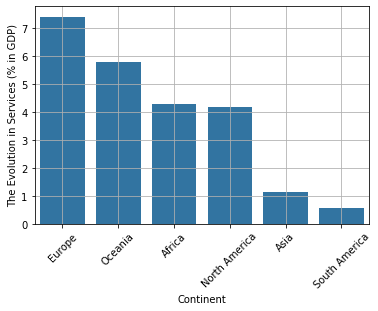

In [49]:
sns.barplot(x="continent", y='services', 
            data=continent_dev_df.sort_values('services', ascending=False), 
            color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('The Evolution in Services (% in GDP)')
plt.show()

Service providers are increasing their activities on all continents. Thus, they contribute more the economics. Europe is the leading country in this transformation. From all three graphs, we can see that European economics is shifting from industrial and agricultural activities to rely more and more on services.

#### Number of Deaths by Murder

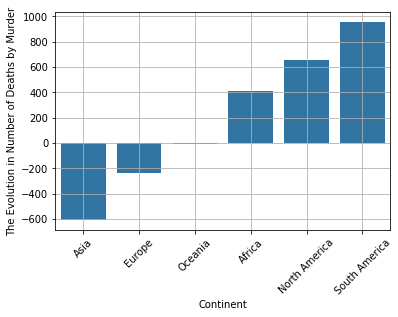

In [50]:
sns.barplot(x="continent", y='murder', data=continent_dev_df.sort_values('murder'),
            color = base_color)
plt.grid()
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('The Evolution in Number of Deaths by Murder')
plt.show()

The lower the murders numbers go the better the continent's performance is. We can see that Asia is doing extra-ordinary work in preventing murders and violence. The number of murders decreased over 15 years. This could be a result of improving living conditions, fighting poverty, and reinforcing law and order. Europe is also doing a good job in this field. Oceania kept the same level. However, numbers in South America are worryingly increasing.

#### Number of Deaths by Suicide

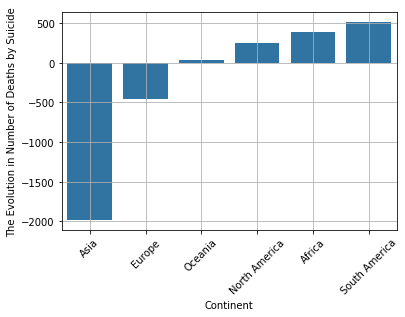

In [51]:
sns.barplot(x="continent", y='suicide', data=continent_dev_df.sort_values('suicide'),
            color = base_color)
plt.grid()
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('The Evolution in Number of Deaths by Suicide')
plt.show()

In this graph, I plotted the continent by increasing the number of suicides because in this indicator the less the evolution is the better the content is performing. We can see that Asia is leading to reducing the number of suicides. The countries are improving living conditions and mental support to prevent suicides. And it seems like they are doing it well. Europe is also doing a good job of preventing suicides. Oceania's suicide levels are slightly increasing over 15 years. 

#### Life Expectancy

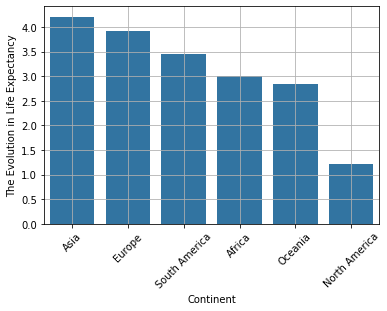

In [52]:
sns.barplot(x="continent", y='life_expectancy', data=continent_dev_df.sort_values('life_expectancy',
                                                                                 ascending=False), 
            color = base_color)
plt.grid()
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('The Evolution in Life Expectancy')
plt.show()

All over the world, with the improvement of technologies and health care services, life expectancy is improving. We can see that Asia is leading this field also.

#### Human Development Index

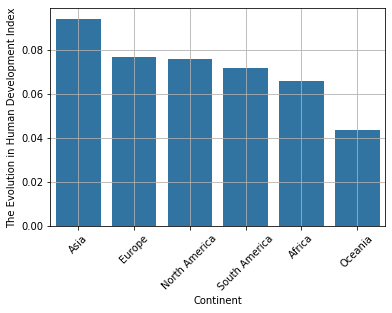

In [53]:
sns.barplot(x="continent", y='hdi', data=continent_dev_df.sort_values('hdi', ascending=False), 
            color = base_color)
plt.grid()
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('The Evolution in Human Development Index')
plt.show()

We can see that all continents are working on improving their HDI index. Asia is once more leading the continents in terms of human development.

### What are the sectors of the continents activities?

Let's start by changing the data format into (continent, sector, value). This would facilitate plotting activity. Therefore, I defined the following function. Then, I plotted the two bar plots one for 1995 and one for 2010.

In [54]:
def df_activity_format(input_df):
    conts =[]
    sec = ['Industry(%)', 'Agriculture(%)', 'Services(%)'] * 6
    vals =[]
    for elt in input_df['continent'].values.tolist():
        for v in input_df[input_df['continent']==elt].values.tolist()[0][1:]:
            conts.append(elt)
            vals.append(v)
    return pd.DataFrame({'continent':conts, 'Sector of Activity':sec, 'values':vals})

In [55]:
continent_2010 = continent_eval[continent_eval['year']==2010]
continent_2010 = continent_2010[['continent', 'industry', 'agriculture', 'services']]
continent_2010 = df_activity_format(continent_2010)
continent_2010

,continent,Sector of Activity,values
0,Africa,Industry(%),24.575556
1,Africa,Agriculture(%),18.300370
2,Africa,Services(%),50.380769
3,Asia,Industry(%),37.382593
4,Asia,Agriculture(%),9.484000
5,Asia,Services(%),47.160000
6,Europe,Industry(%),24.223077
7,Europe,Agriculture(%),4.206179
8,Europe,Services(%),59.869231
9,North America,Industry(%),25.286667


In [56]:
continent_1995 = continent_eval[continent_eval['year']==1995]
continent_1995 = continent_1995[['continent', 'industry', 'agriculture', 'services']]
continent_1995 = df_activity_format(continent_1995)

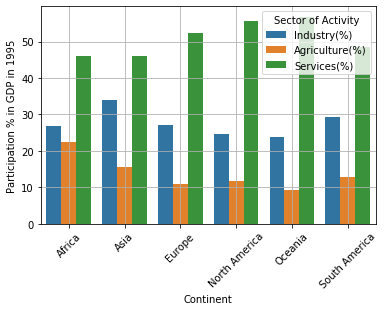

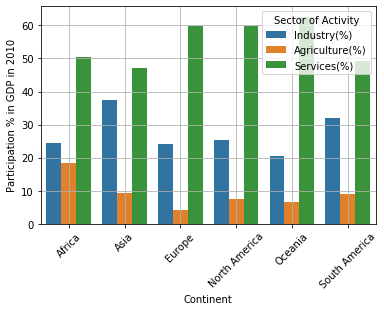

In [57]:
sns.barplot(x="continent", y='values', hue='Sector of Activity',
            data=continent_1995)
plt.grid()
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel("Participation % in GDP in 1995")
plt.show()
sns.barplot(x="continent", y='values', hue='Sector of Activity',
            data=continent_2010)
plt.grid()
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel("Participation % in GDP in 2010")
plt.show()

We can see that all continents are giving more importance to services over agriculture and industry. The services sector contributes to the GDP of these continents with a mean value of at least 47%. Plus the contribution of this sector seems to be growing in all continents.

### Which country is doing best on each indicator in Europe and Africa?

In this part, I will focus my analysis on the countries of Europe and Africa seperately. Let's start with Africa. 

#### Africa

In [58]:
africa_df = gapminder_df[gapminder_df['continent']=='Africa']
africa_df = africa_df[africa_df['year']==2010].dropna()
africa_df.head(5)

,country,year,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent
223,Benin,2010,0.5530,45600.0,397.0,2.81,2560.0,15.00,31.0,1820.0,70.3,22.10,22.70,44.7,271.0,698.0,0.454,61.4,Africa
271,Botswana,2010,2.3300,114000.0,1070.0,1.75,2230.0,446.00,615.0,13200.0,49.5,31.90,2.49,47.5,297.0,320.0,0.678,60.2,Africa
351,Cameroon,2010,0.3400,199000.0,349.0,2.73,2510.0,18.20,61.3,2880.0,72.8,27.20,14.10,52.1,741.0,1820.0,0.486,57.7,Africa
591,Ethiopia,2010,0.0751,123000.0,486.0,2.64,2080.0,8.41,15.7,1080.0,79.4,9.44,41.40,41.8,8700.0,5940.0,0.411,62.9,Africa
655,Gabon,2010,2.9300,220000.0,3100.0,3.31,2730.0,160.00,302.0,15500.0,39.2,55.20,3.91,33.6,75.8,115.0,0.664,62.8,Africa


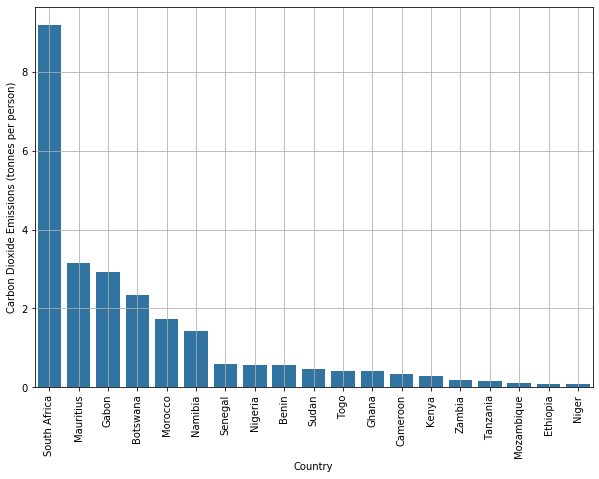

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='co2_emissions', data=africa_df.sort_values('co2_emissions',
                                                                                 ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Carbon Dioxide Emissions (tonnes per person)')
plt.show()

- We can see that Niger is quite environmentally friendly when it comes to CO2 emissions. In fact, in Niger, there are not a lot of cars, buses, etc... Even [paved roads](https://dlca.logcluster.org/display/public/DLCA/2.3+Niger+Road+Network) are limited. 
- South Africa is by far the most polluting country among these African countries. 

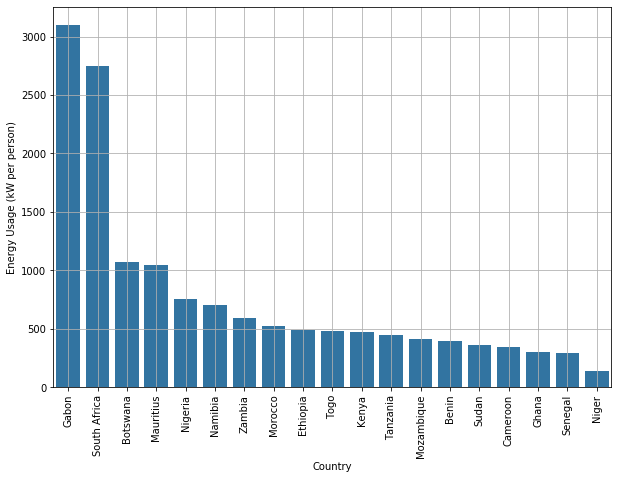

In [60]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='energy_usage', data=africa_df.sort_values('energy_usage',
                                                                                 ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Energy Usage (kW per person)')
plt.show()


- Niger is the lowest country for energy usage. This is mainly because electricity access in Niger is still limited to 12.4% in 2010. You can find more about Niger's electricity coverage [here](https://www.se4all-africa.org/seforall-in-africa/country-data/niger/).
- Gabon has the highest value of energy usage. This is caused by the big industrial efforts of Gabon. 

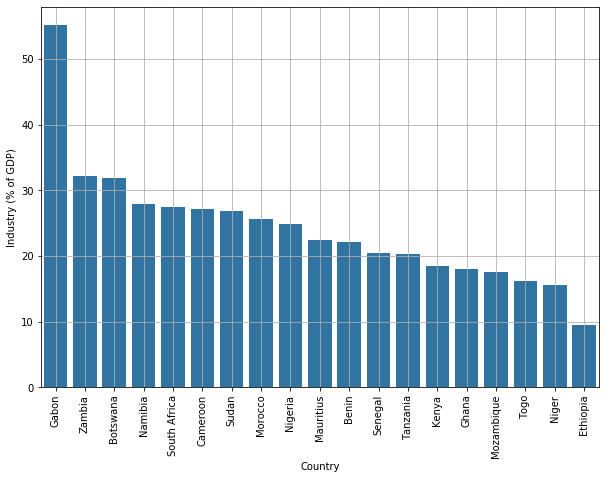

In [61]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='industry', data=africa_df.sort_values('industry', ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Industry (% of GDP)')
plt.show()

- This figure confirms the big industrial effort of Gabon. On the other hand, Ethiopia has almost no industrial power. 

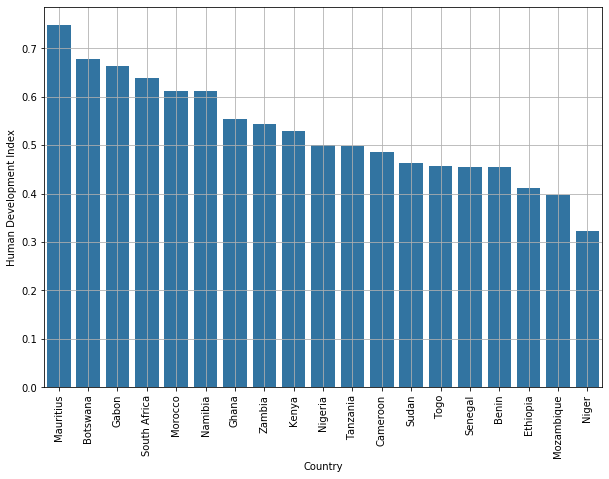

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='hdi', data=africa_df.sort_values('hdi', ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Human Development Index')
plt.show()

- We can see that the human development index varies a lot in Africa with Mauritius with the highest score and Niger with only 0.3 in the lowest. 

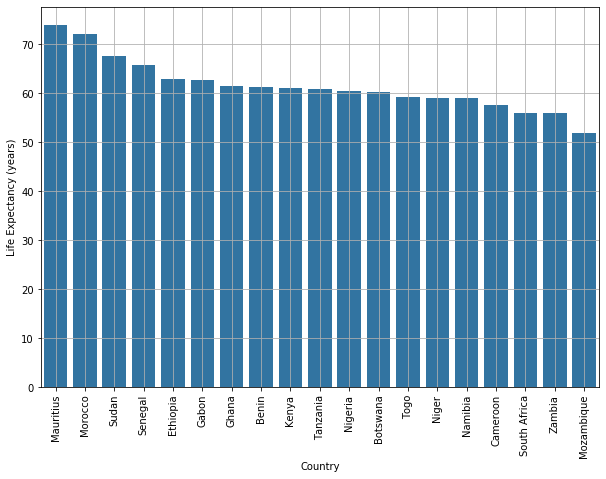

In [63]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='life_expectancy', data=africa_df.sort_values('life_expectancy', ascending=False), 
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Life Expectancy (years)')
plt.show()

- The life expectancy between African countries seems to vary a lot. With more than 20 years of difference between the highest value obtained in Mauritius and the lowest value obtained in Mozambique.

#### Europe

In [64]:
europe_df = gapminder_df[gapminder_df['continent']=='Europe']
europe_df = europe_df[europe_df['year']==2010].dropna()
europe_df.head(5)

,country,year,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent
15,Albania,2010,1.56,7760.0,729.0,-0.496,3080.0,94.0,241.0,9930.0,46.6,24.9,18.00,44.0,68.4,195.0,0.738,77.6,Europe
79,Armenia,2010,1.47,3310.0,863.0,-0.391,2770.0,54.2,134.0,6700.0,48.2,32.9,17.00,37.0,128.0,232.0,0.729,74.0,Europe
111,Austria,2010,8.03,38600.0,4050.0,0.240,3720.0,3840.0,4960.0,43300.0,57.1,25.5,1.27,62.3,73.6,1470.0,0.880,80.6,Europe
127,Azerbaijan,2010,3.40,10100.0,1280.0,1.190,2970.0,67.3,332.0,16200.0,60.4,59.8,5.50,27.9,351.0,400.0,0.741,69.3,Europe
175,Belarus,2010,6.65,85300.0,2900.0,-0.170,3200.0,248.0,320.0,16300.0,62.3,35.4,8.89,43.5,909.0,3450.0,0.787,70.4,Europe


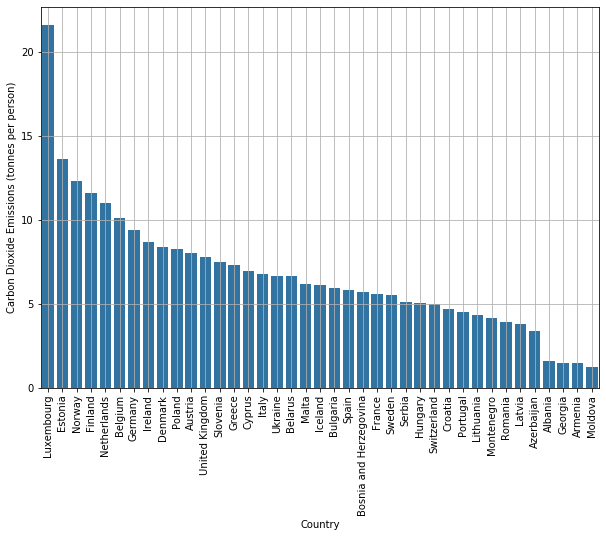

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='co2_emissions', data=europe_df.sort_values('co2_emissions',
                                                                                 ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Carbon Dioxide Emissions (tonnes per person)')
plt.show()

- Surprisingly Luxembourg is the most polluting country among the studied European countries. I find this result quite surprising because Luxembourg is a very very small country. However, it is considered a very rich country and it wouldn't surprise me that every person owns a vehicle.

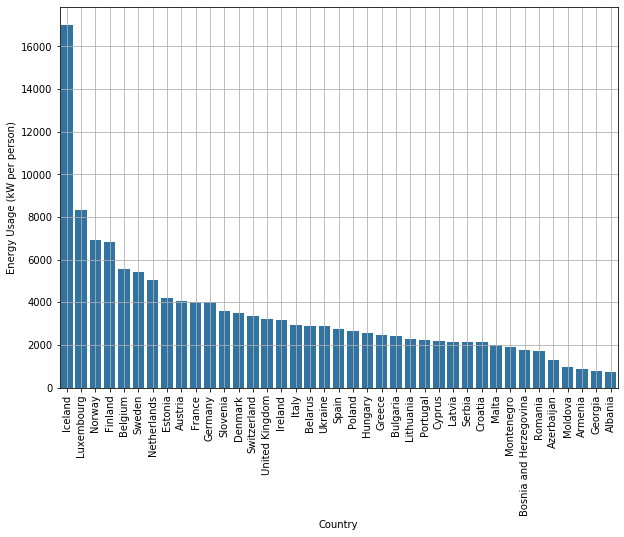

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='energy_usage', data=europe_df.sort_values('energy_usage',
                                                                                 ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Energy Usage (kW per person)')
plt.show()

- This result is also surprising. Iceland uses more energy than any other European country present in this study. But why? 

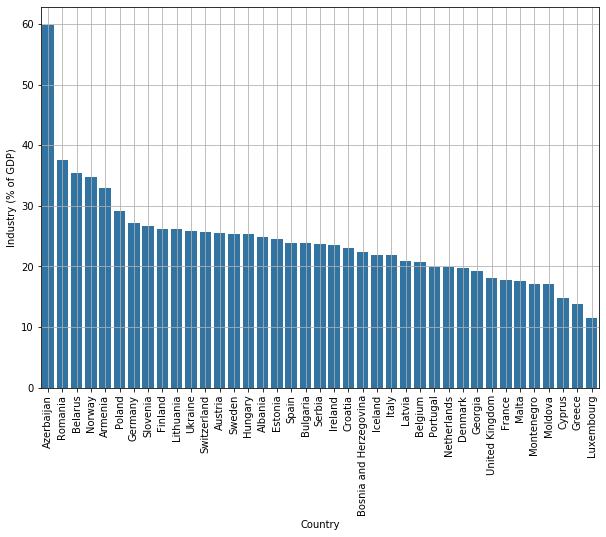

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='industry', data=europe_df.sort_values('industry',
                                                                                 ascending=False), 
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Industry (% of GDP)')
plt.show()

- The industrial power of Iceland is not that important. But why does it consume that much energy? 
- Azerbaijan bases most of its economy on industrial activities. 

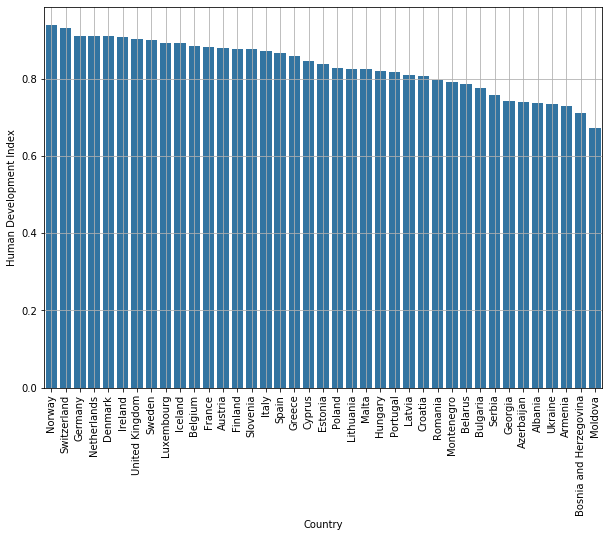

In [68]:
plt.figure(figsize=(10,7))
sns.barplot(x="country", y='hdi', data=europe_df.sort_values('hdi', ascending=False),
            color = base_color)
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Human Development Index')
plt.show()


- We can see that the most developed country in Europe probably the world (I will check this) in terms of HDI is Norway. 
- We can also notice that most eastern European countries are in a very promising development way. 
- We can almost find all eastern European countries under the threshold of 0.8 of HDI.

In [69]:
gapminder_df[gapminder_df['year']==2010].sort_values('hdi', ascending=False).head()

,country,year,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy,continent
1375,Norway,2010,12.30,121000.0,6930.0,1.250,3490.0,6790.0,8090.0,62400.0,63.4,34.7,1.570,52.8,43.1,593.0,0.939,80.9,Europe
1727,Switzerland,2010,4.98,12400.0,3350.0,1.040,3450.0,4610.0,7810.0,55900.0,63.7,25.6,0.699,70.0,66.2,1320.0,0.932,82.5,Europe
95,Australia,2010,17.70,1230000.0,5790.0,1.560,3210.0,3250.0,4780.0,41500.0,62.1,25.1,2.200,65.8,308.0,2630.0,0.927,82.0,Oceania
703,Germany,2010,9.38,114000.0,4000.0,-0.153,3500.0,3600.0,4670.0,40400.0,55.3,27.1,0.647,62.2,733.0,12000.0,0.912,80.4,Europe
1295,Netherlands,2010,11.00,3730.0,5030.0,0.513,3210.0,4430.0,5590.0,46100.0,61.8,19.9,1.710,68.3,163.0,1890.0,0.911,80.8,Europe


So yes Norway is the most developed country in the world in terms of HDI. 

### General Correlation

Before studying which features has relationships together visually we can mathematically study this using Pearson's correlation computation. Based on the obtained results we would select some features to visualize to confirm the theoretical results. 

In [70]:
corr_matrix = gapminder_df[gapminder_df['year']==2010][gapminder_df.columns.tolist()[2:]].corr()
corr_matrix

,co2_emissions,forest_area,energy_usage,population_growth,food_supply,gov_health_spend,health_money,income,employment,industry,agriculture,services,murder,suicide,hdi,life_expectancy
co2_emissions,1.000000,0.032609,0.841143,0.068596,0.526609,0.445752,0.445462,0.784237,0.023786,0.427027,-0.519575,0.113387,-0.104323,-0.028613,0.573738,0.413689
forest_area,0.032609,1.000000,0.017014,-0.015404,0.066357,0.055980,0.078735,0.000207,0.160345,0.049041,-0.061399,0.004977,0.645258,0.265163,0.046211,0.067274
energy_usage,0.841143,0.017014,1.000000,0.002706,0.498450,0.531777,0.523037,0.757229,0.066127,0.295928,-0.480924,0.163359,-0.146031,-0.067145,0.567697,0.414808
population_growth,0.068596,-0.015404,0.002706,1.000000,-0.321767,-0.185788,-0.195401,-0.018291,0.315757,0.244530,0.290556,-0.311880,-0.011257,-0.058685,-0.422674,-0.312922
food_supply,0.526609,0.066357,0.498450,-0.321767,1.000000,0.598846,0.616313,0.669036,-0.248200,0.019375,-0.598949,0.423467,-0.055193,-0.035628,0.789686,0.682388
gov_health_spend,0.445752,0.055980,0.531777,-0.185788,0.598846,1.000000,0.990005,0.782771,0.031156,-0.164008,-0.448107,0.464069,-0.134491,-0.044655,0.652111,0.518153
health_money,0.445462,0.078735,0.523037,-0.195401,0.616313,0.990005,1.000000,0.787003,0.026011,-0.172716,-0.473002,0.492304,-0.125855,-0.049696,0.676282,0.539341
income,0.784237,0.000207,0.757229,-0.018291,0.669036,0.782771,0.787003,1.000000,0.013927,0.228808,-0.615820,0.330598,-0.148811,-0.075610,0.757407,0.582959
employment,0.023786,0.160345,0.066127,0.315757,-0.248200,0.031156,0.026011,0.013927,1.000000,0.002767,0.352367,-0.131512,0.065957,0.035634,-0.195959,-0.120724
industry,0.427027,0.049041,0.295928,0.244530,0.019375,-0.164008,-0.172716,0.228808,0.002767,1.000000,-0.228737,-0.664431,0.051477,0.092579,0.096456,-0.047923


### What are the indicators that correlate with the CO2 emissions? 

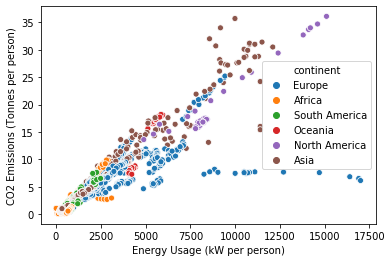

In [71]:
sns.scatterplot(x="energy_usage", y='co2_emissions', hue= 'continent', data= gapminder_df)
plt.xlabel('Energy Usage (kW per person)')
plt.ylabel('CO2 Emissions (Tonnes per person)')
plt.show()

We can see from this graph that the CO2 emissions and energy consumption are positively correlated. the relationship is almost linear.

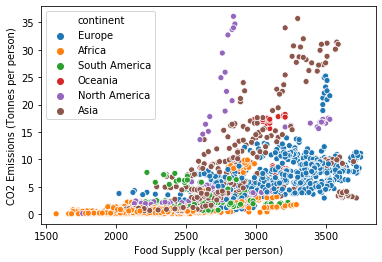

In [72]:
sns.scatterplot(x="food_supply", y='co2_emissions', hue= 'continent', data= gapminder_df)
plt.xlabel('Food Supply (kcal per person)')
plt.ylabel('CO2 Emissions (Tonnes per person)')
plt.show()

Food supply and CO2 emissions are also positively correlated. But the relationship here is not linear like for energy consumption.

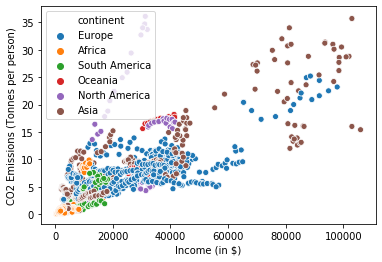

In [73]:
sns.scatterplot(x="income", y='co2_emissions', hue= 'continent', data= gapminder_df)
plt.xlabel('Income (in $)')
plt.ylabel('CO2 Emissions (Tonnes per person)')
plt.show()

The income is positively correlated with the CO2 emission and a linear relationship exists between these two features. 

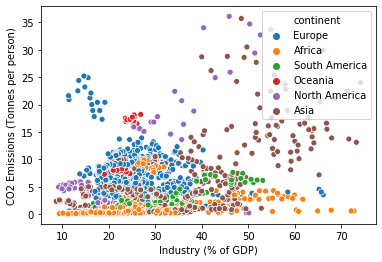

In [74]:
sns.scatterplot(x="industry", y='co2_emissions', hue='continent', data= gapminder_df)
plt.xlabel('Industry (% of GDP)')
plt.ylabel('CO2 Emissions (Tonnes per person)')
plt.show()

We can see that industry participation in % of GDP is correlated with CO2 emissions. However, the relationship is not so linear. 

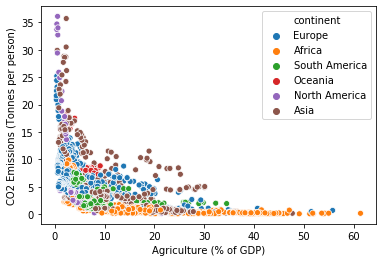

In [75]:
sns.scatterplot(x="agriculture", y='co2_emissions', hue='continent', data= gapminder_df)
plt.xlabel('Agriculture (% of GDP)')
plt.ylabel('CO2 Emissions (Tonnes per person)')
plt.show()

We can notice that the CO2 emission and agriculture participation in % of GDP are negatively correlated. We can observe an exponential tendency in this relationship.

## What are the indicators that correlate with the Human Development Index? 

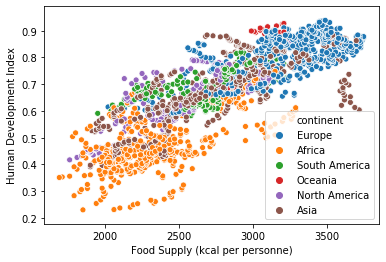

In [76]:
sns.scatterplot(x="food_supply", y='hdi', hue='continent', data= gapminder_df)
plt.xlabel("Food Supply (kcal per personne)")
plt.ylabel("Human Development Index")
plt.show()

In the [definition](https://en.wikipedia.org/wiki/Human_Development_Index) of the human development index, we can find that the HDI takes into consideration if the people are well fed. It's only logical to find that the food supply is positively correlated with the HDI.

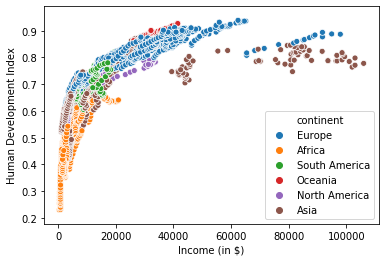

In [77]:
sns.scatterplot(x="income", y='hdi', hue='continent', data= gapminder_df)
plt.xlabel('Income (in $)')
plt.ylabel("Human Development Index")
plt.show()

HDI is computed upon the income of the people. This is only logical also to find that income and HDI are positively related. We can also see that compared to the food supply the relationship here seems more exponential.

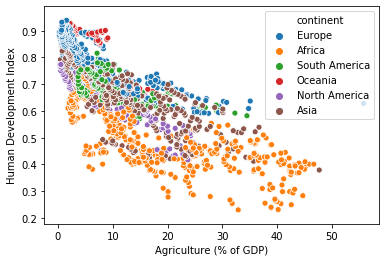

In [78]:
sns.scatterplot(x="agriculture", y='hdi', hue='continent', data= gapminder_df)
plt.xlabel('Agriculture (% of GDP)')
plt.ylabel("Human Development Index")
plt.show()

The participation of agriculture in % of GDP is negatively correlated with the HDI. I wonder if this is caused by the fact that countries with high HDI have very low agriculture activities (and thus the participation of agriculture is low). Or is it that agriculture is considered as a very tiring job w low income (or returns)? Let's plot this relationship and try to figure this out. 

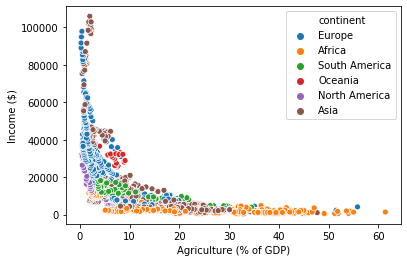

In [79]:
sns.scatterplot(x="agriculture", y='income', hue='continent', data= gapminder_df)
plt.xlabel('Agriculture (% of GDP)')
plt.ylabel("Income ($)")
plt.show()

We can see that agriculture and income are negatively correlated with what seems like an exponential relationship. However, this graph is also influenced by the fact that countries with high incomes like European countries do not rely on agriculture activities. On the other hand, poor countries like African countries have higher agriculture activities and their economics rely on agriculture. So we cannot firmly conclude on why agriculture acts negatively on HDI. But most likely, it would be caused by an indirect influence on income.

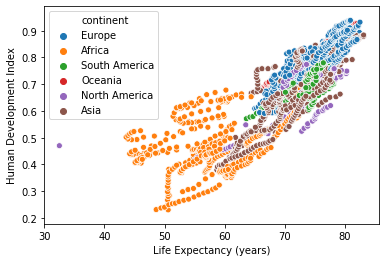

In [80]:
sns.scatterplot(x="life_expectancy", y='hdi', hue='continent', data= gapminder_df)
plt.xlabel('Life Expectancy (years)')
plt.ylabel("Human Development Index")
plt.show()

HDI is also computed from life expectancy. Thus, it's only logical that the two features are correlated positively. 

### Is there a relationship between the deaths by suicide with other indicators?

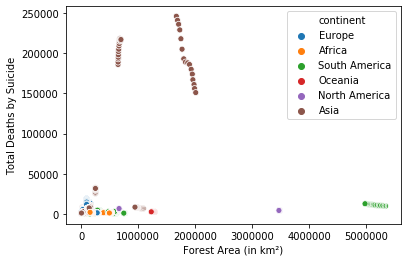

In [81]:
sns.scatterplot(x="forest_area", y='suicide', hue='continent', data= gapminder_df)
plt.xlabel("Forest Area (in km²)")
plt.ylabel("Total Deaths by Suicide")
plt.show()

Although the two features are quite correlated mathematically, we cannot visually confirm this relationship.

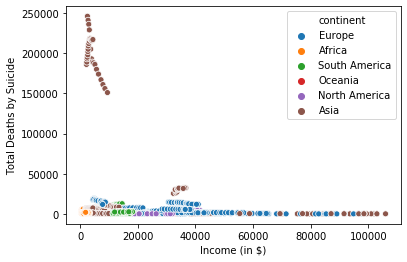

In [82]:
sns.scatterplot(x="income", y='suicide', hue='continent', data= gapminder_df)
plt.xlabel("Income (in $)")
plt.ylabel("Total Deaths by Suicide")
plt.show()

One can intuitively think that one of the causes of suicide is poverty. However, we cannot see a direct relationship between the income and the deaths caused by suicide. 

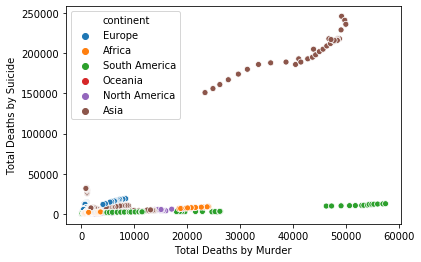

In [83]:
sns.scatterplot(x="murder", y='suicide', hue='continent', data= gapminder_df)
plt.xlabel("Total Deaths by Murder")
plt.ylabel("Total Deaths by Suicide")
plt.show()

we can see a small trend between the total deaths by murders and by suicide. Mathematically, there is quite a strong positive correlation between the two. The correlation can be seen stronger when seeing each continent alone. 

### Is there a relationship between the deaths by murder with other indicators?

We know for sure that the murders and suicides are quite correlated let's see for other features.

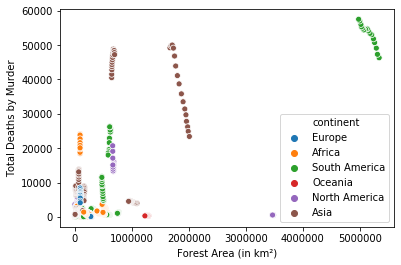

In [84]:
sns.scatterplot(x="forest_area", y='murder', hue = 'continent', data= gapminder_df)
plt.xlabel("Forest Area (in km²)")
plt.ylabel("Total Deaths by Murder")
plt.show()

Mathematically, the correlation value between the forest area and the number of murders is quite high at 0.62. When looking at the graph we can see that there is a trend of a relationship. Continents with higher forest areas are more likely to have higher cases of murder. But I believe this is more related to the fact that in these continents (mainly South America and Asia) countries are not so secure. And they tend to have higher organised crime activities such as [drug cartels](https://en.wikipedia.org/wiki/Illegal_drug_trade_in_Latin_America). So I believe that the correlation is more to which continent than to the forest area. Let's compare the total area of forest per continent and the total murders per continent to see if this supports my assumption. 

In [85]:
y_2010 = gapminder_df[gapminder_df['year']==2010].groupby('continent',as_index=False).sum()

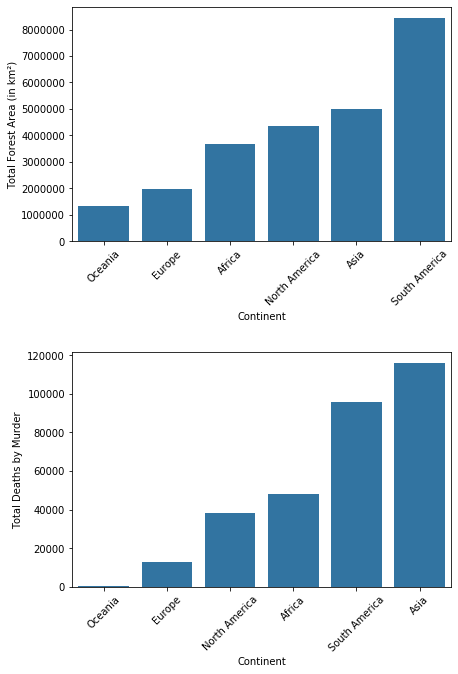

In [86]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
sns.barplot(x='continent',y='forest_area', data=y_2010.sort_values('forest_area'), color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('Total Forest Area (in km²)')
plt.subplot(2,1,2)
sns.barplot(x='continent',y='murder', data=y_2010.sort_values('murder'), color = base_color)
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('Total Deaths by Murder')
plt.tight_layout(pad=3.0)
plt.show()

We can see from these two plots that the continents with the lowest total forest area are the ones with the lowest murders. And the continents with the largest forests are the ones with the highest deaths by violence. This supports my assumption that murder is more related to the continent than to the forest area.

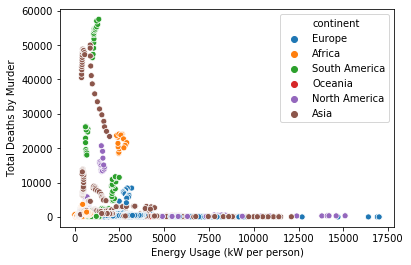

In [87]:
sns.scatterplot(x="energy_usage", y='murder', hue='continent', data= gapminder_df)
plt.xlabel('Energy Usage (kW per person)')
plt.ylabel("Total Deaths by Murder")
plt.show()

Visually it is not so clear that murder and energy usages are so correlated. However, we can see that the more energy we consume the safer we get. But it's not like that. Energy consumption can be seen as an indicator of how poor or wealthy a country or a continent is. And more likely violence and murder, in particular, are more likely to be related to poverty. Let's check if this is a valid assumption by plotting the income and murders.

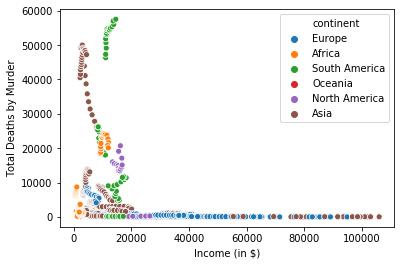

In [88]:
sns.scatterplot(x="income", y='murder', hue='continent', data= gapminder_df)
plt.xlabel("Income (in $)")
plt.ylabel("Total Deaths by Murder")
plt.show()

Well, it's quite as I explained, the two plots are very similar with the same shape and trends. In some cases, the points are almost in the same place. Which explains that energy consumption is more an indicator of the country's poverty.


<a id='conclusions'></a>
## Conclusions
To summarize, in this report, I present some analyses performed on several indicators of countries' performances. These indicators integrate several fields: environment, economics, activities, health, and development. All data used in this analysis is found on the [Gapminder](https://www.gapminder.org/data/) website. 

First, I loaded the intended data and transformed it into a more practical format. Then, I focused on analyzing the performance of continents. Trends of evolution and best performing continents in each indicator have been identified through the plots. The trends in the continents economic activities have also been investigated. It seems like the service's activities are gaining more attention all over the world. It's a growing field and it contributes more to the continents' GDP. 

Second, I investigated some of the continents. My second study focused on African and European countries. I tried to identify the best-performing countries in these two continents. 

Finally, I presented the correlation matrix between the different indicators. And I tried to see for some indicators (CO2 emissions, Human Development Index, murders, and suicides) what are the most correlated features. The choice of the plotted correlated features was based on the numeric value of the correlation obtained in the matrix. 

Whenever a strange surprising result is observed I tried to think of reasons that explain the findings. Sometimes new questions popup so I either try to solve them by plotting extra figures, checking the internet for general information, or I just point them out and precise that I do not have the required data to perform the analysis or confirm the assumption. 


Throughout this analysis, I used python 3 and its modules for loading data, perform calculation, and plot the visuals. It was quite a good experience. 
